# Geothermal doublets

In this notebook, we will take a look at geothermal doublets. It will cover the definition of a geothermal doublet installation, explain some _buzzwords_ such as "thermal breakthrough" or "kalina cycle", and show some results of a numerical doublet simulation.  
This simulation is run with SHEMAT-Suite, a numerical code for simulating heat- and mass transfer in a porous medium. The simulations are run on a synthetic model of a graben system over a time of 35 years. That means, we simulate geothermal power production over a lifespan of 35 years.

<img src='https://images.fd.nl/archive/89002_def-tno-geothermie.jpg?fit=crop&crop=faces&auto=format%2Ccompress&q=45&w=1280' style="float: left; width: 27%; margin-right: 3%; margin-bottom: 0.5em;"> 
### Introduction 
A geothermal doublet system usually consists of -at least- two boreholes, connected via a surface application installation (such as a powerplant for producing electricity, or an installation for district heating). One geothermal well produces the hot fluid (or steam) from the subsurface. This well is called the producer. The heat of the produced fluid is used accordingly, and the significant cooler fluid is then re-injected in the geothermal reservoir. In the figure to the left, the producing well is marked as a red line, while the injecting well is marked as a blue line, representing the difference in fluid temperature.   

If the heat content of the produced "fluid" is large enough, i.e. dry steam is produced, a turbine can be directly operated in one circuit. If the temperatures of the fluide are lower and do not really suffice to operate a turbine directly, a binary cycle is often installed. In such a cycle, the produced fluid heats up a secondary fluid in a heat-exchanger. This secondary fluid has a significantly lower boiling point, an can thus be used to operate a turbine instead.  Such a system is often called a [Kalina installation](https://en.wikipedia.org/wiki/Kalina_cycle), where the secondary fluid is a mixture of water and ammonia.  

Operating such a system over a prolonged time will eventually cause a decrease in production temperature, as the cooling front of the re-injected water reaches the producing borehole. The point in time, where production temperature starts to decrease significantly is called a _thermal breakthrough_. In the results of a simplified doublet simulation, which we study in this notebook, we will also look for a thermal breakthrough.
<br>[Image source](https://images.fd.nl/archive/89002_def-tno-geothermie.jpg?fit=crop&crop=faces&auto=format%2Ccompress&q=45&w=1280)


In [2]:
# necessary libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for improving plot aesthetics
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

## 3D reservoir model
For assessing this (rather cold) geothermal system, we simulate the heat- and mass transfer in a synthetic, three dimensional model. The model consists of 4 geological units:  
* Basement  
* Bottom Unit  
* Reservoir Unit  
* Top Unit  

The reservoir Unit is a geological body with a high primary porosity and permeability, which enables a natural darcy flow, and also shows advective heat transport by convection. Convection increases the geothermal potential of a system, as hot fluids are flowing upwards due to lower density, cooling down, and descending again. Kind of like [lava lamps](https://lavalamp.com/wp-content/uploads/2016/08/6825_1500x2000.jpg), which were popular back in the days.  
In the plot below, we see a vertical cross-section of the model in x-direction (let's say an East-West cross-section). On the left, you can see the geological units with annotations, on the right the natural temperature field. There, we can already see strongly bent isothermes, which are caused by an interplay of differences in thermal conductivity of the geological units, and advective heat transport.  
For assessing, which of those processes, i.e. conductive vs. advective heat transport, we could perform a peclet number analysis (there will also be a notebook on peclet number analysis in this repository). For the moment, it is sufficient to state, that both processes are present in this model.

/home/bl2/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


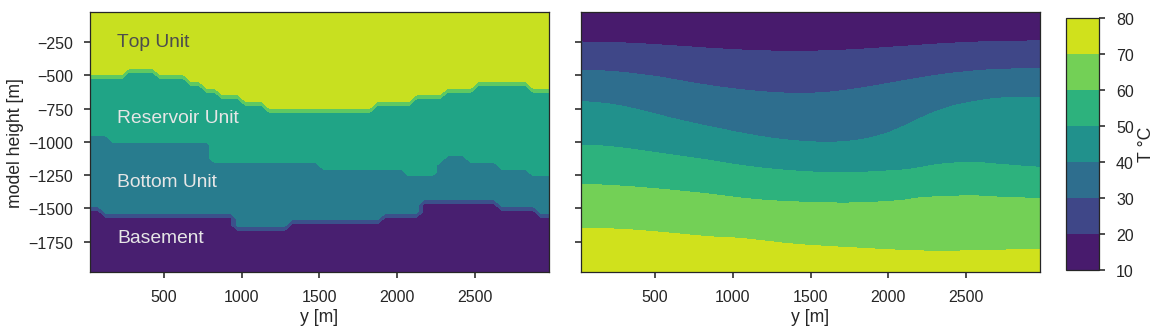

In [50]:
# 3D model file
mod = h5py.File('../data/Input_f_final.h5')
x = mod['x'][0,0,:]
y = mod['y'][0,:,0]
z = mod['z'][:,0,0]
t = mod['temp'][:,:,:]
ui = mod['uindex'][:,:,:]

# plot routine
cs = 25 # cross -section position
fig, axs = plt.subplots(1, 2, figsize=[15,5], sharey=True, sharex=True)
ax1 = axs[0].contourf(y, z-2000, ui[:,:,cs], 4, cmap= 'viridis') # geological units
ax2 = axs[1].contourf(y, z-2000, t[:,:,cs], cmap='viridis') # temperature

# axes arguments
axs[0].set_ylabel('model height [m]')
axs[0].set_xlabel('y [m]')
axs[1].set_xlabel('y [m]')

# annotations
axs[0].text(200, -1750, 'Basement', color=[.9,.9,.9])
axs[0].text(200, -1335, 'Bottom Unit', color=[.9,.9,.9])
axs[0].text(200, -850, 'Reservoir Unit', color=[.9,.9,.9])
axs[0].text(200, -280, 'Top Unit', color=[.3,.3,.3])

# colormap
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1., 0.21, 0.03, 0.7])
fig.colorbar(ax2, cax=cbar_ax, label= 'T °C')

# layout option
plt.tight_layout()